In [4]:
!pip install pillow # for PIL, image processing/generation 
!pip install rdkit #for chemical structures reading/analysis
!pip install rlextra -i https://www.reportlab.com/pypi/




[notice] A new release of pip is available: 25.2 -> 26.0.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 25.2 -> 26.0.1
[notice] To update, run: pip install --upgrade pip
Looking in indexes: https://www.reportlab.com/pypi/
User for www.reportlab.com: ^C

[notice] A new release of pip is available: 25.2 -> 26.0.1
[notice] To update, run: pip install --upgrade pip
ERROR: Operation cancelled by user


In [61]:
from __future__ import annotations
from typing import Dict, List, Optional, Tuple

import io
from PIL import Image

import rdkit
from rdkit import Chem
from rdkit.Chem import Draw, Descriptors, Crippen
from rdkit.Chem import Draw
from rdkit.Chem.Draw import rdMolDraw2D




In [36]:
def get_number_of_atoms(mol: rdkit.Chem.rdchem.Mol) -> Optional[int]: 
    return mol.GetNumAtoms()

In [62]:
def pick_label(mol: rdkit.Chem.rdchem.Mol, label_prop: Optional[str] | None, fallback_index: Optional[int]) -> Optional[str]:
    if label_prop and mol.HasProp(label_prop):
        v = mol.GetProp(label_prop).strip()
        if v:
            return v
    # RDKit stores SDF title line in _Name
    if mol.HasProp("_Name"):
        v = mol.GetProp("_Name").strip()
        if v:
            return v
    # common-ish names
    for k in ("ID", "Name", "MolID", "Compound_ID", "CompoundID", "title"):
        if mol.HasProp(k):
            v = mol.GetProp(k).strip()
            if v:
                return v
    return f"#{fallback_index}"


def calc_builtin_props(mol: rdkit.Chem.rdchem.Moll) -> Dict[str, str]:
    # Safe defaults; ignore failures quietly
    out = {}
    try:
        out["MW"] = f"{Descriptors.MolWt(mol):.2f}"
    except Exception:
        pass
    try:
        out["logP"] = f"{Crippen.MolLogP(mol):.2f}"
    except Exception:
        pass
    return out


def get_prop_string(mol: rdkit.Chem.rdchem.Mol, props: List[str]) -> Optional[str]:
    """
    props can be:

SDF property names
MW, logP (computed)
    """
    built = calc_builtin_props(mol)
    parts = []
    for p in props:
        p = p.strip()
        if not p:
            continue
        if p in built:
            parts.append(f"{p}={built[p]}")
        elif mol.HasProp(p):
            v = mol.GetProp(p).strip().replace("\n", " ")
            if v:
                parts.append(f"{p}={v}")
    return "  ".join(parts)

In [13]:
INPUT_SDF = "../Structures of compounds_Xiaoyi_2026.02.12/3.5 WuXi OTS Library_Solid Stock_2685cpds_Molecule Glue Lib_260119.sdf"
OUTPUT_SDF = "./test.sdf"
SUPPL = Chem.SDMolSupplier(INPUT_SDF, removeHs=False)
MOLS = [m for m in SUPPL if m is not None]


In [20]:
print(f'[INFO] Number of molecules in {INPUT_SDF}:\n {len(MOLS)}')

[INFO] Number of molecules in ../Structures of compounds_Xiaoyi_2026.02.12/3.5 WuXi OTS Library_Solid Stock_2685cpds_Molecule Glue Lib_260119.sdf:
 2685


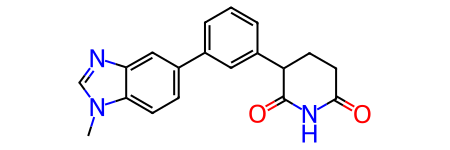

In [27]:
MOLS[0] # https://www.rdkit.org/docs/source/rdkit.Chem.rdchem.html#rdkit.Chem.rdchem.Mol.GetAromaticAtoms

In [38]:
#for mol in MOLS:
#    print(get_number_of_atoms(mol))

In [33]:
type(MOLS[0])

rdkit.Chem.rdchem.Mol

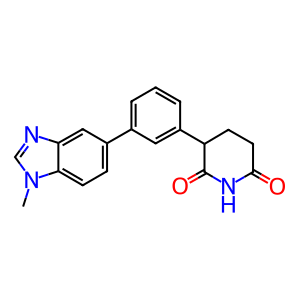

In [31]:
Draw.MolToImage(MOLS[0])

In [54]:
MOLS[0].GetNumAtoms()

24

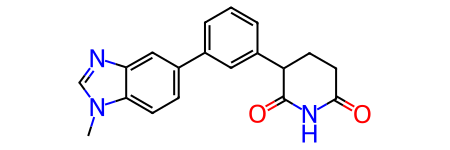

In [47]:
MOLS[0]

In [48]:
MOLS[0].GetProp("_Name")

''

In [52]:
D = rdMolDraw2D.MolDraw2DCairo(250, 200)
D.drawOptions().addStereoAnnotation = True
D.drawOptions().addAtomIndices = True
D.DrawMolecule(MOLS[0])
D.FinishDrawing()

In [56]:
pick_label(MOLS[0], "CompoundID", 1)

'WXMG_A06B334'

In [57]:
calc_builtin_props(MOLS[0])

{'MW': '319.36', 'logP': '2.76'}

In [60]:
get_prop_string(MOLS[0], ["MW","logP"])

'MW=319.36  logP=2.76'